In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt


In [9]:
Samples = 100
Nsims = 500
T = 20 #num of time slots
N = 6 # num of nodes

nodes = np.zeros(N)
slots = np.zeros(T)
probs = np.linspace(0,1,Samples)
s = np.zeros(probs.shape)
simRes = np.zeros((Nsims,probs.shape[0]))




In [23]:
for j in range(simRes.shape[0]):
    for i in range(simRes.shape[1]):
        p = probs[i]
        for t in range(T): 
            for n in range(N):
                r = random.uniform(0, 1)
                nodes[n] = 1 if r<=p else 0
            slots[t] = 1 if np.sum(nodes)==1 else 0
        simRes[j][i] = np.sum(slots)
meanS = np.mean(simRes, axis=0)
#Theoretical result
for i in range(simRes.shape[1]):
    p = probs[i]
    s[i] = N*p*(1-p)**(N-1)

plt.plot(probs, meanS/T, label=f'Simulation result for {Nsims} simulations')
plt.plot(probs, s, label='Theoretical (True) result')
plt.title('p Vs. Proportion of successful transmission slots')
plt.xlabel('Success probability for one node (p)')
plt.ylabel('Proportion of successful transmission slots')
plt.legend()
plt.show()


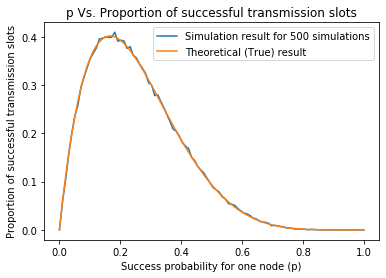